In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score, KFold,cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

### Reading data

In [2]:
data=pd.read_csv('Documents/Optimization/Indian Liver Patient Dataset (ILPD).csv',skipinitialspace=True)

In [3]:
data.shape

(582, 11)

#### Adding headings to each column

In [4]:
columns = ['age','gender','total Bilirubin','direct Bilirubin','total proteins','albumin','A/G ratio','SGPT','SGOT','Alkphos','Selector']
data=data.set_axis(columns, axis=1)

### Data preprocessing

In [5]:
data.isnull().sum()

age                 0
gender              0
total Bilirubin     0
direct Bilirubin    0
total proteins      0
albumin             0
A/G ratio           0
SGPT                0
SGOT                0
Alkphos             4
Selector            0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               582 non-null    int64  
 1   gender            582 non-null    object 
 2   total Bilirubin   582 non-null    float64
 3   direct Bilirubin  582 non-null    float64
 4   total proteins    582 non-null    int64  
 5   albumin           582 non-null    int64  
 6   A/G ratio         582 non-null    int64  
 7   SGPT              582 non-null    float64
 8   SGOT              582 non-null    float64
 9   Alkphos           578 non-null    float64
 10  Selector          582 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.1+ KB


In [7]:
#Filling Nan with mean of that column
data['Alkphos'].fillna(float(data['Alkphos'].mean()), inplace=True)

In [8]:
data.isnull().sum()

age                 0
gender              0
total Bilirubin     0
direct Bilirubin    0
total proteins      0
albumin             0
A/G ratio           0
SGPT                0
SGOT                0
Alkphos             0
Selector            0
dtype: int64

In [9]:
#Dropping duplicate rows
data=data.drop_duplicates()

In [10]:
data.shape

(569, 11)

In [11]:
data['Selector'].shape

(569,)

### Data quality report

In [66]:
data.describe()

,age,total Bilirubin,direct Bilirubin,total proteins,albumin,A/G ratio,SGPT,SGOT,Alkphos,Selector
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,44.813708,3.326362,1.500000,291.934974,79.840070,109.541301,6.495782,3.148682,0.948082,1.288225
std,16.234432,6.272490,2.835117,245.468274,181.611654,291.111322,1.089183,0.797489,0.318784,0.453335
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.947145,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [18]:
#finding ranges for each feature
for col in numerical:
  mn=data[col].min()
  mx=data[col].max()
  print(col,':','(',mn,',',mx,')')

age : ( 4 , 90 )
gender : ( 0 , 1 )
total Bilirubin : ( 0.4 , 75.0 )
direct Bilirubin : ( 0.1 , 19.7 )
total proteins : ( 63 , 2110 )
albumin : ( 10 , 2000 )
A/G ratio : ( 10 , 4929 )
SGPT : ( 2.7 , 9.6 )
SGOT : ( 0.9 , 5.5 )
Alkphos : ( 0.3 , 2.8 )
Selector : ( 0 , 1 )


In [13]:
data['Selector']=data['Selector'].map({1:'Yes',2:'No'})

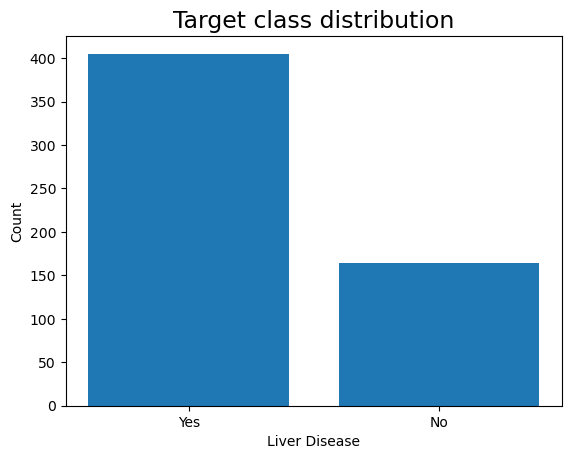

In [17]:
counts=data['Selector'].value_counts()
# create a bar plot
plt.bar(counts.index, counts.values)
plt.title('Target class distribution', fontsize=17)
plt.xticks(rotation='horizontal')
plt.xlabel('Liver Disease')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='gender'>

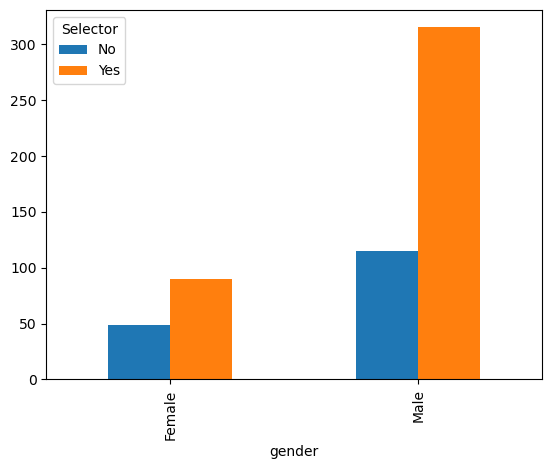

In [197]:
pd.crosstab(data['gender'],data['Selector']).plot(kind='bar')

### Converting categorical to numerical entry and changing to binary class

In [14]:
data['gender']=data['gender'].map(lambda x: 0 if x=='Female' else 1)
data['Selector']=data['Selector'].map({'Yes':1,'No':0})

In [15]:
print(data['Selector'].value_counts())
data['gender'].value_counts()

1    405
0    164
Name: Selector, dtype: int64


1    430
0    139
Name: gender, dtype: int64

In [16]:
numerical=data.select_dtypes(exclude='object')

In [17]:
numerical.columns

Index(['age', 'gender', 'total Bilirubin', 'direct Bilirubin',
       'total proteins', 'albumin', 'A/G ratio', 'SGPT', 'SGOT', 'Alkphos',
       'Selector'],
      dtype='object')

### Visualization plots

C:\Users\HPC\AppData\Local\Temp\ipykernel_16020\3726837259.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i])


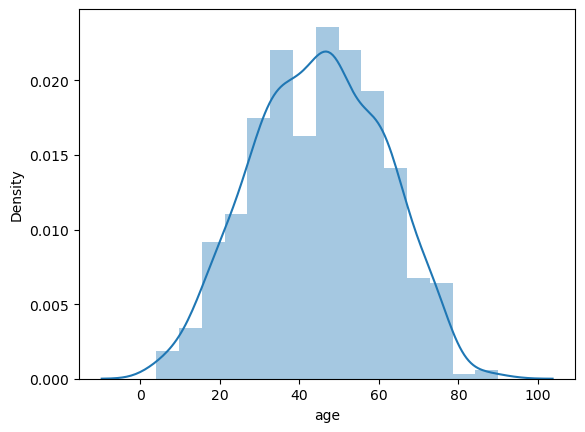

C:\Users\HPC\AppData\Local\Temp\ipykernel_16020\3726837259.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i])


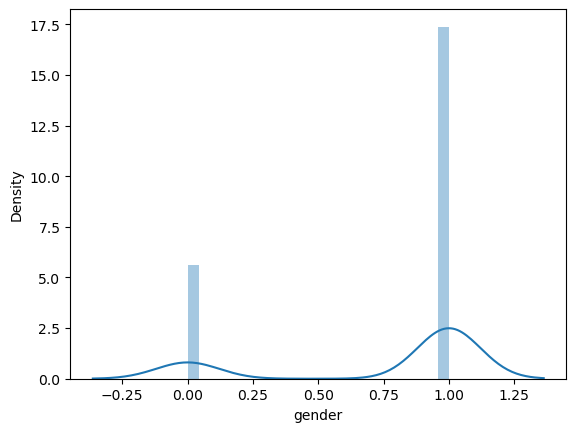

C:\Users\HPC\AppData\Local\Temp\ipykernel_16020\3726837259.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i])


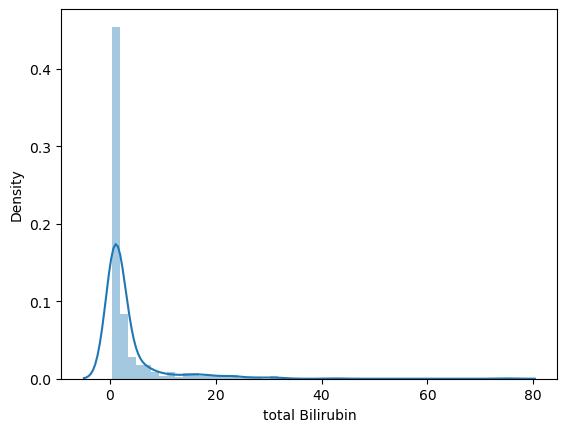

C:\Users\HPC\AppData\Local\Temp\ipykernel_16020\3726837259.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i])


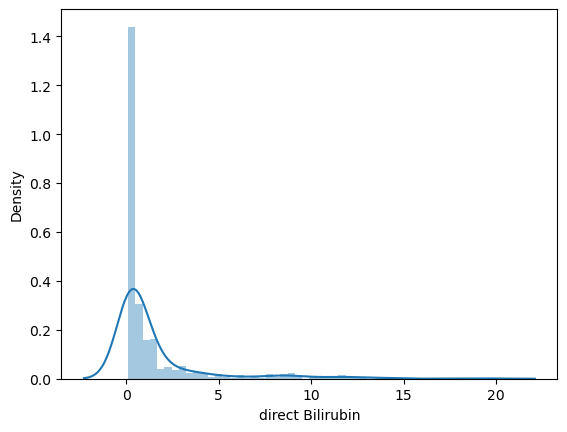

C:\Users\HPC\AppData\Local\Temp\ipykernel_16020\3726837259.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i])


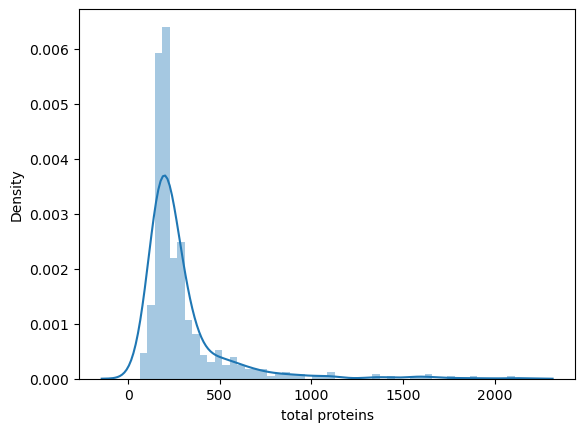

C:\Users\HPC\AppData\Local\Temp\ipykernel_16020\3726837259.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i])


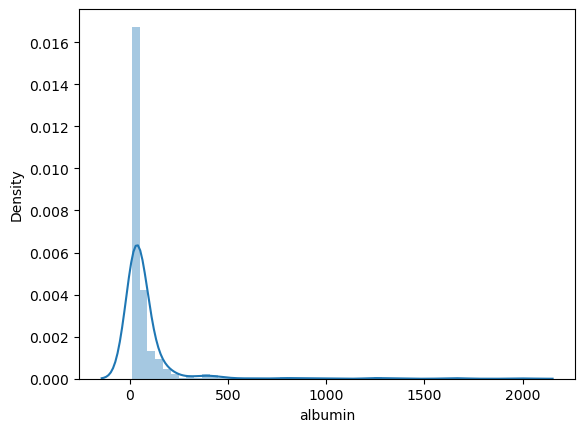

C:\Users\HPC\AppData\Local\Temp\ipykernel_16020\3726837259.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i])


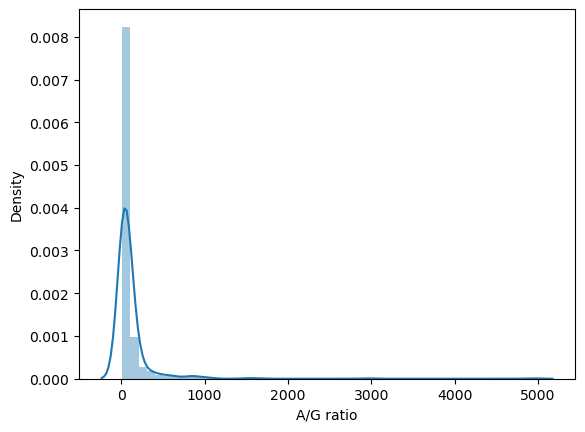

C:\Users\HPC\AppData\Local\Temp\ipykernel_16020\3726837259.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i])


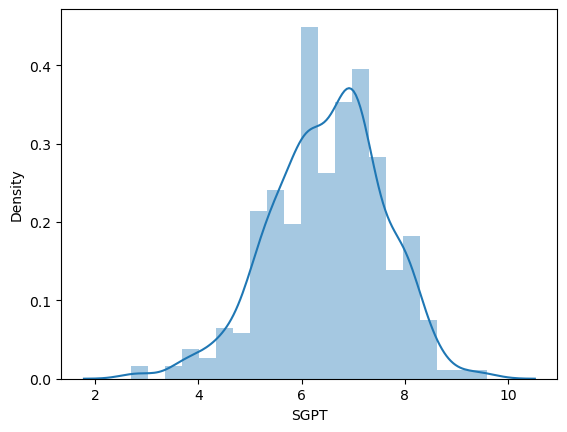

C:\Users\HPC\AppData\Local\Temp\ipykernel_16020\3726837259.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i])


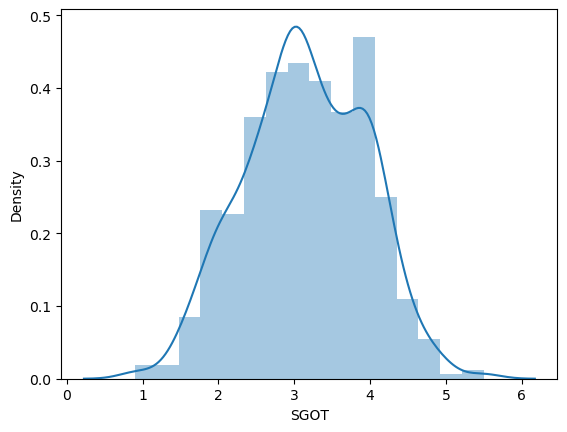

C:\Users\HPC\AppData\Local\Temp\ipykernel_16020\3726837259.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i])


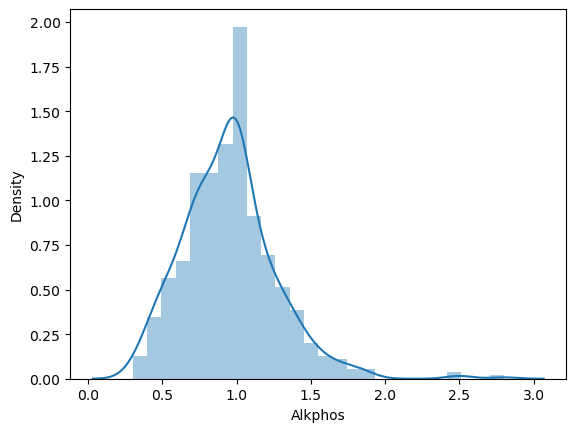

C:\Users\HPC\AppData\Local\Temp\ipykernel_16020\3726837259.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i])


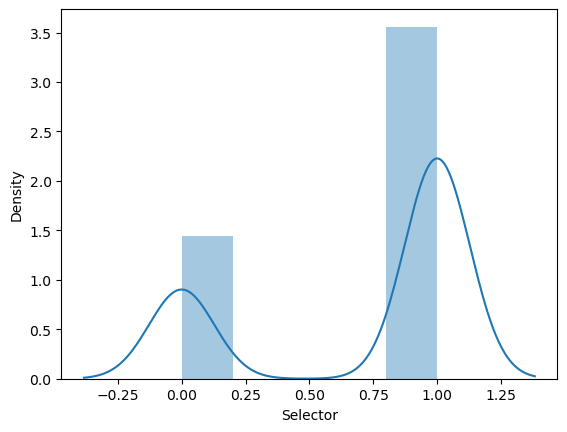

In [37]:
#Distribution plot
for i in numerical:
    sn.distplot(data[i])
    plt.xlabel(i)
    plt.show()

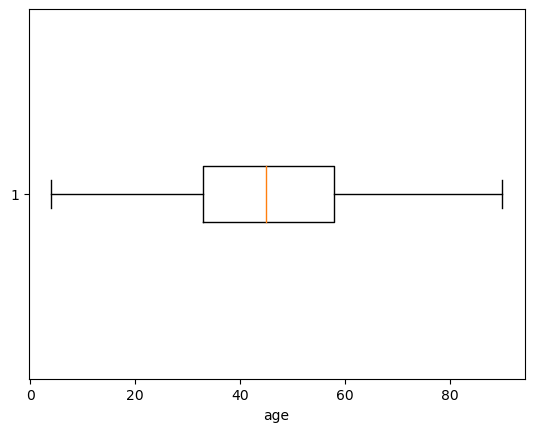

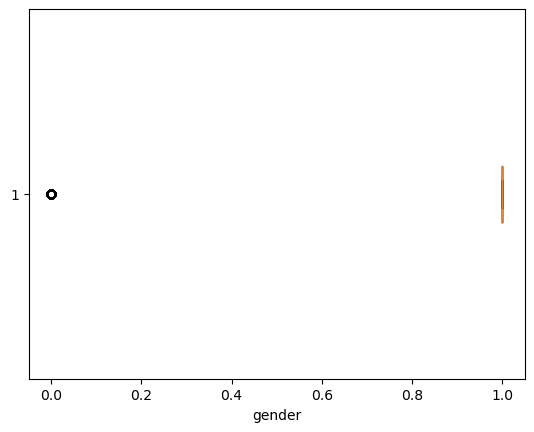

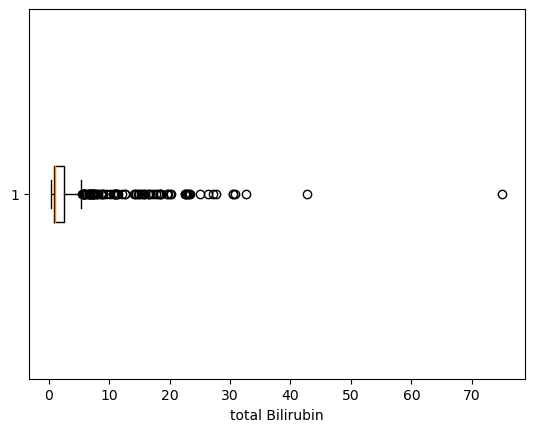

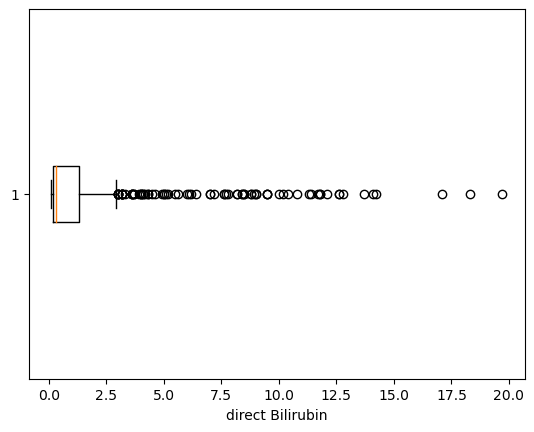

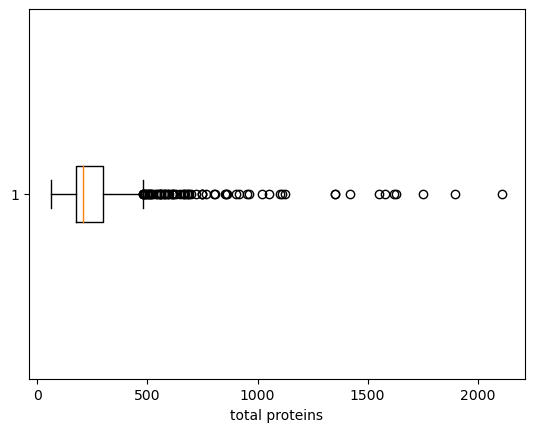

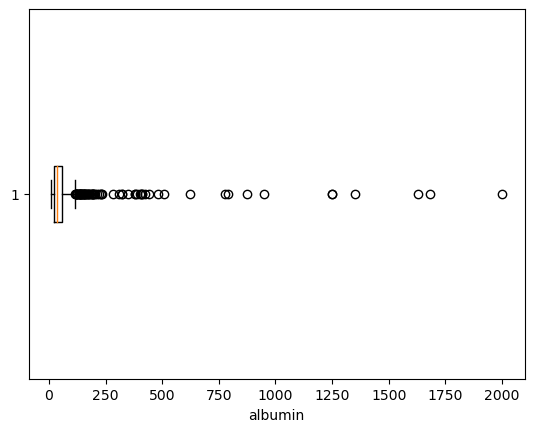

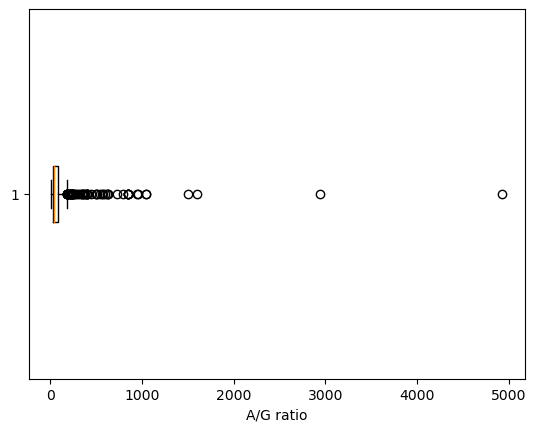

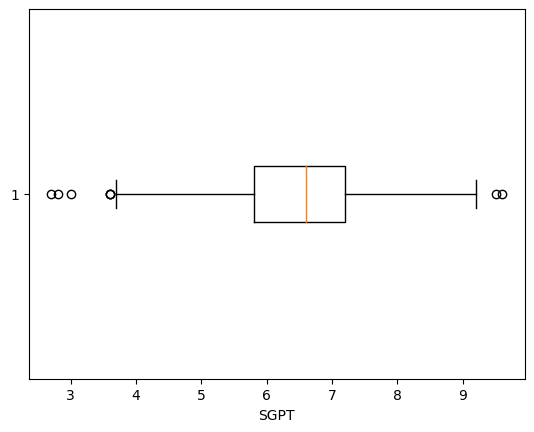

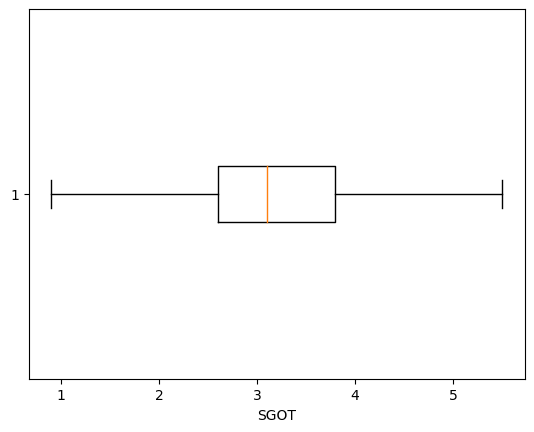

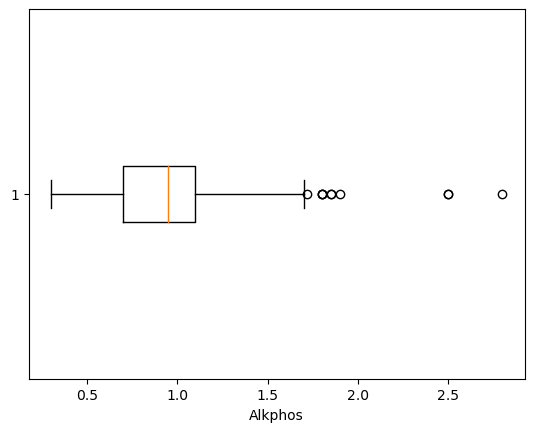

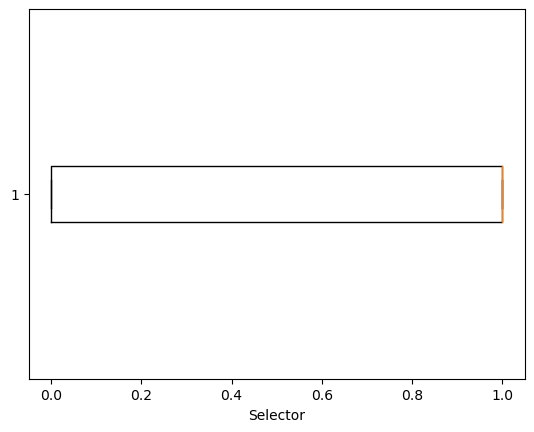

In [41]:
#Box plot
for i in numerical:
    plt.boxplot(data[i],vert=0)
    plt.xlabel(i)
    plt.show()

<Axes: >

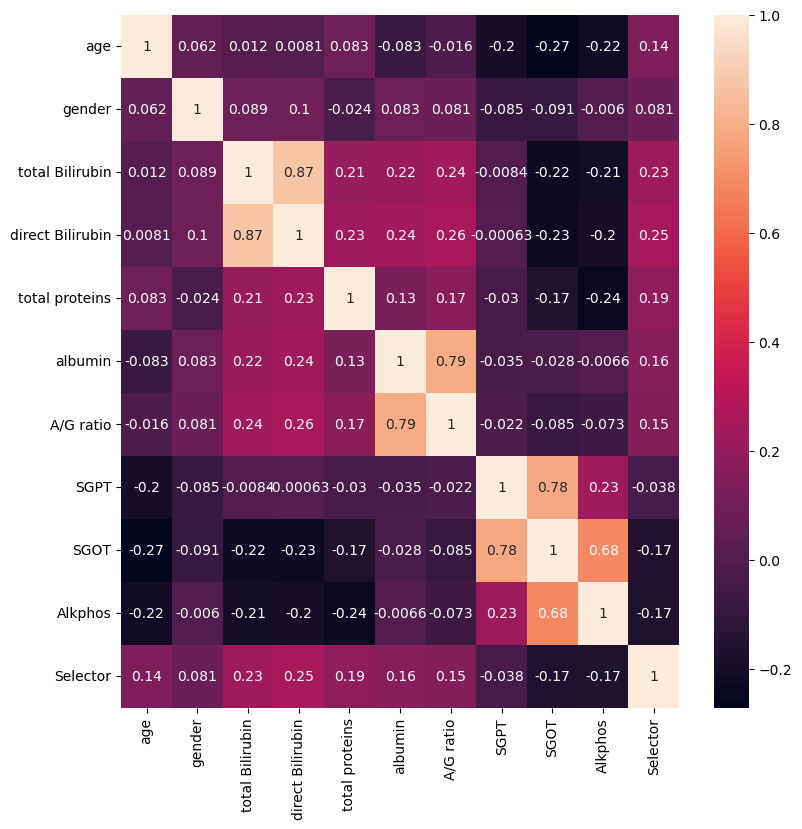

In [211]:
plt.subplots(figsize=(9,9))
sn.heatmap(data.corr(),annot=True)

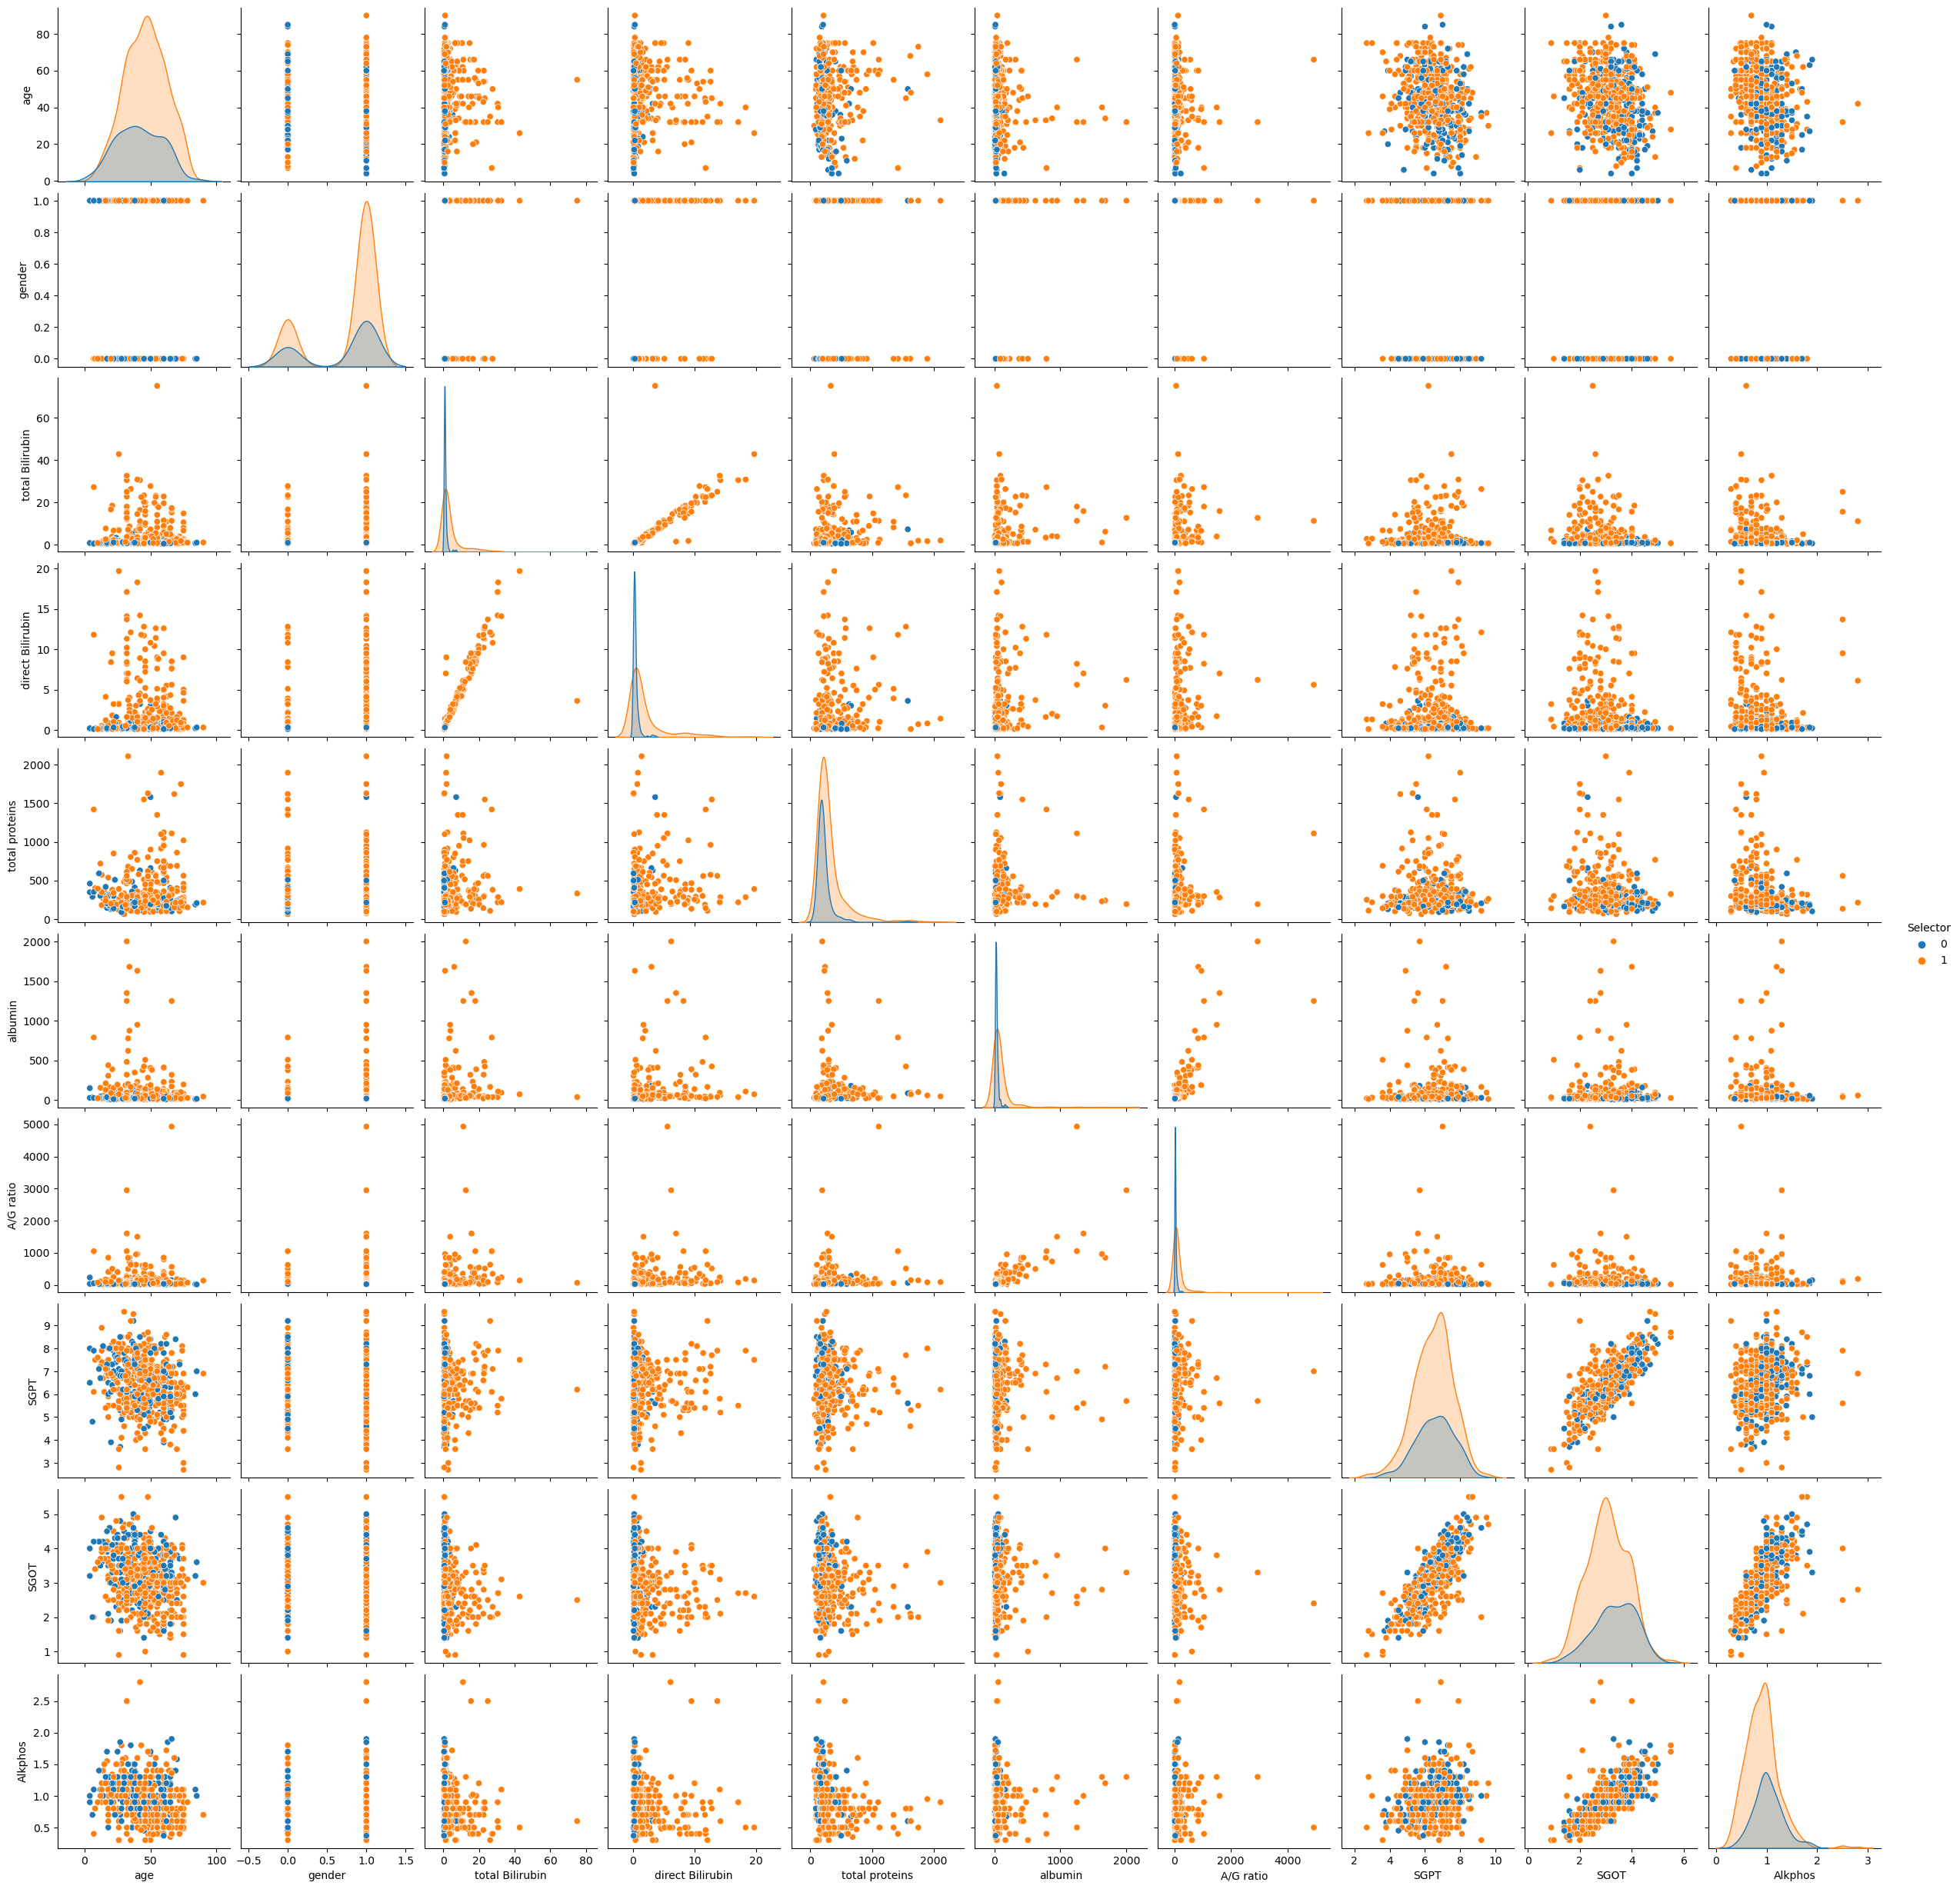

In [212]:
sn.pairplot(data,hue='Selector')

### Modeling

In [19]:
n_features=data.select_dtypes(include=['object','category'])

In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for i in n_features:
    data[i] = label_encoder.fit_transform(data[i])

In [21]:
X=data.drop('Selector',axis=1)
y=data['Selector']

In [22]:
X.shape

(569, 10)

#### KNN Classifier

In [43]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
model_KNN = KNeighborsClassifier(n_neighbors =3)
model_KNN.fit(X,y)
ypred_KNN = model_KNN.predict(X)
print("Accuracy percentage\n")
print(accuracy_score(y,ypred_KNN)*100)
print("\nClassification Report\n")
print(classification_report(y,ypred_KNN))

Accuracy percentage

83.12829525483303

Classification Report

              precision    recall  f1-score   support

           0       0.74      0.64      0.69       164
           1       0.86      0.91      0.88       405

    accuracy                           0.83       569
   macro avg       0.80      0.77      0.79       569
weighted avg       0.83      0.83      0.83       569



#### Random Forest Classifier

In [102]:
#Create a Gaussian Classifier
RandomForest_model=RandomForestClassifier(n_estimators=500)
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.2)
RandomForest_model.fit(Xtrain,ytrain)
y_pred_Forest=RandomForest_model.predict(Xtest)
print("Accuracy Percentage:\n")
print(accuracy_score(ytest,y_pred_Forest)*100)
print("\nClassification Report\n")
print(classification_report(ytest,y_pred_Forest))
print("\nConfusion Matrix\n")
print(confusion_matrix(ytest,y_pred_Forest))

Accuracy Percentage:

92.0

Classification Report

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       108
           1       0.91      0.91      0.91        92

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200


Confusion Matrix

[[100   8]
 [  8  84]]


#### Logistic regression

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
print('Accuracy percentage:',f"{score*100:.2f}")
print("\nClassification Report\n")
print(classification_report(y_test,predictions))
print("\nConfusion Matrix\n")
print(confusion_matrix(y_test,predictions))

Accuracy percentage: 68.42

Classification Report

              precision    recall  f1-score   support

           0       0.25      0.14      0.18        28
           1       0.76      0.86      0.80        86

    accuracy                           0.68       114
   macro avg       0.50      0.50      0.49       114
weighted avg       0.63      0.68      0.65       114


Confusion Matrix

[[ 4 24]
 [12 74]]


C:\Users\HPC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Decision Tree Classifier

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
tree_classifier = DecisionTreeClassifier(criterion='gini',random_state=42)

# Train the classifier on the training data
tree_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = tree_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report\n")
print(classification_report(y_test,y_pred))
print("\nConfusion Matrix\n")
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.62

Classification Report

              precision    recall  f1-score   support

           0       0.30      0.39      0.34        28
           1       0.78      0.70      0.74        86

    accuracy                           0.62       114
   macro avg       0.54      0.55      0.54       114
weighted avg       0.66      0.62      0.64       114


Confusion Matrix

[[11 17]
 [26 60]]


#### AdaBoost Classifier

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the base classifier
base_classifier = DecisionTreeClassifier(max_depth=5)

# Initialize the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Train the AdaBoost classifier on the training data
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = adaboost_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report\n")
print(classification_report(y_test,y_pred))

Accuracy: 0.87

Classification Report

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        93
           1       0.90      0.85      0.88       107

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200



#### XGBoost Classifier

In [129]:
model = xgb.XGBClassifier(n_estimators=50, max_depth=3, learning_rate=0.1)
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.2)
model.fit(Xtrain, ytrain)
y_pred = model.predict(Xtest)
accuracy = accuracy_score(ytest, y_pred)
print("Accuracy:", accuracy*100)
print("\nClassification Report\n")
print(classification_report(ytest,y_pred))

Accuracy: 92.5

Classification Report

              precision    recall  f1-score   support

           0       0.92      0.93      0.92        95
           1       0.93      0.92      0.93       105

    accuracy                           0.93       200
   macro avg       0.92      0.93      0.92       200
weighted avg       0.93      0.93      0.93       200



#### SVM Classifier

In [134]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier with a linear kernel (you can choose different kernels like 'rbf', 'poly', etc.)
svm_classifier = SVC(kernel='linear')

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.2)
# Train the classifier on the training data
svm_classifier.fit(Xtrain, ytrain)

# Make predictions on the test data
y_pred = svm_classifier.predict(Xtest)

# Evaluate the model's performance
accuracy = accuracy_score(ytest, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print a classification report with more metrics
print("\nClassification Report\n")
print(classification_report(ytest, y_pred))

Accuracy: 0.91

Classification Report

              precision    recall  f1-score   support

           0       0.88      0.91      0.90        89
           1       0.93      0.90      0.91       111

    accuracy                           0.91       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.91      0.91       200



#### Naive Bayes Classifier

In [133]:
# Initialize the Naive Bayes classifier (GaussianNB)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier on the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = nb_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report\n")
print(classification_report(ytest,y_pred))

Accuracy: 0.80

Classification Report

              precision    recall  f1-score   support

           0       0.45      0.56      0.50        93
           1       0.51      0.40      0.45       107

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.47       200
weighted avg       0.48      0.47      0.47       200



## AUC Curve

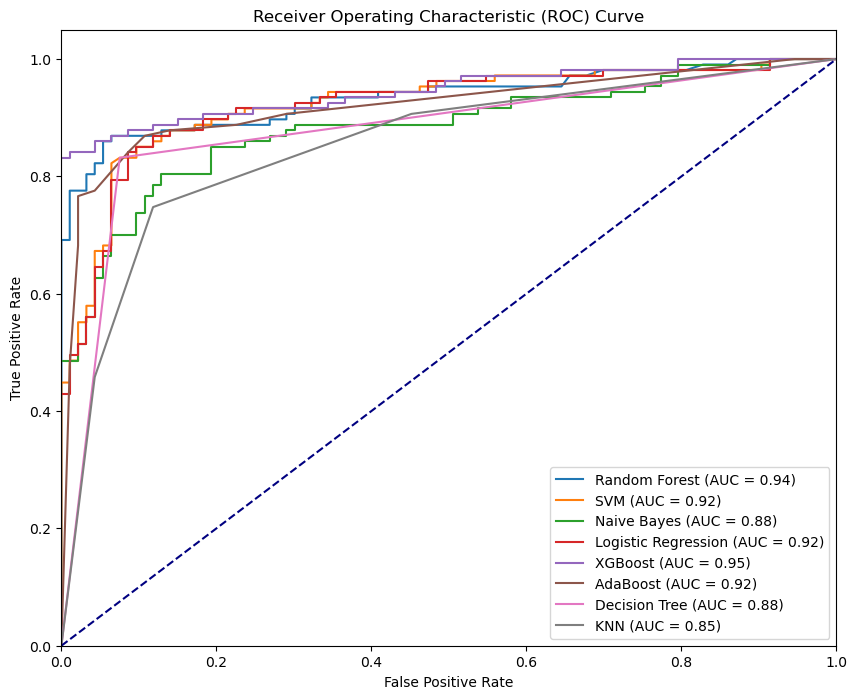

In [144]:
from sklearn.metrics import roc_curve, auc


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize multiple classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=500),
    "SVM": SVC(probability=True,kernel='linear'),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "XGBoost": xgb.XGBClassifier(n_estimators=50, max_depth=3, learning_rate=0.1),
    "AdaBoost": DecisionTreeClassifier(max_depth=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors =3),
    
}

# Create an ROC curve for each classifier
plt.figure(figsize=(10, 8))
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_score = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the ROC curve for each classifier
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [29]:
# Initialize multiple classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=500),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(kernel='linear'),
    "Logistic Regression": LogisticRegression(),
    "XGBoost": xgb.XGBClassifier(n_estimators=50, max_depth=3, learning_rate=0.1),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "Decision Tree": DecisionTreeClassifier(criterion='gini',random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors =3)
}

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
i=0
for classifier_name, classifier_instance in classifiers.items():
    model=classifier_instance
    predicted = cross_val_predict(model, X, y, cv=5)
    i=i+1
    # Generate confusion matrix for the entire cross-validation
    conf_matrix = confusion_matrix(y, predicted)

    # Print the confusion matrix
    print(i,") Confusion Matrix of ", classifier_name)
    print(conf_matrix)

    TP = conf_matrix[1, 1]  # True Positives
    TN = conf_matrix[0, 0]  # True Negatives
    FP = conf_matrix[0, 1]  # False Positives
    FN = conf_matrix[1, 0]  # False Negatives

    # Calculate Specificity (True Negative Rate) and Sensitivity (True Positive Rate)
    print("Specificity - " ,TN / (TN + FP))
    print("Sensitivity - ", TP / (TP + FN))

1 ) Confusion Matrix of  Random Forest
[[ 59 105]
 [ 62 343]]
Specificity -  0.3597560975609756
Sensitivity -  0.8469135802469135
2 ) Confusion Matrix of  Naive Bayes
[[156   8]
 [238 167]]
Specificity -  0.9512195121951219
Sensitivity -  0.4123456790123457
3 ) Confusion Matrix of  SVM
[[  0 164]
 [  0 405]]
Specificity -  0.0
Sensitivity -  1.0


C:\Users\HPC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HPC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

4 ) Confusion Matrix of  Logistic Regression
[[ 36 128]
 [ 37 368]]
Specificity -  0.21951219512195122
Sensitivity -  0.908641975308642
5 ) Confusion Matrix of  XGBoost
[[ 38 126]
 [ 55 350]]
Specificity -  0.23170731707317074
Sensitivity -  0.8641975308641975
6 ) Confusion Matrix of  AdaBoost
[[ 71  93]
 [ 80 325]]
Specificity -  0.4329268292682927
Sensitivity -  0.8024691358024691
7 ) Confusion Matrix of  Decision Tree
[[ 74  90]
 [ 99 306]]
Specificity -  0.45121951219512196
Sensitivity -  0.7555555555555555
8 ) Confusion Matrix of  KNN
[[ 54 110]
 [ 92 313]]
Specificity -  0.32926829268292684
Sensitivity -  0.7728395061728395
